# Nonparametric tests

  Test | One population | Two populations | Two populations (paired samples)  
  ------------- | -------------|
  **Sign test**  | $\times$ | | $\times$ 
  **Rank test** | $\times$  | $\times$ | $\times$  
  **Permutation** | $\times$  | $\times$ | $\times$ 

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 laboratory mice were placed in two-room cells, in one of the rooms hung a mirror. In order to determine whether mice have any preferences for mirrors, the proportion of time that each mouse spent in each of its two cells was measured.

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Loading data

In [3]:
mouses_data = pd.read_csv('mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [4]:
mouses_data

proportion_of_time
0             0.348471
1             0.640620
2             0.549818
3             0.537454
4             0.400444
5             0.426292
6             0.417156
7             0.477977
8             0.450657
9             0.476602
10            0.488677
11            0.484741
12            0.481614
13            0.489406
14            0.467365
15            0.467330

In [5]:
mouses_data.describe()

proportion_of_time
count           16.000000
mean             0.475289
std              0.066065
min              0.348471
25%              0.444566
50%              0.477289
75%              0.488859
max              0.640620

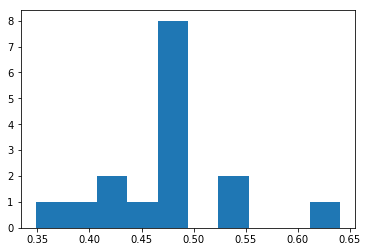

In [6]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## tests for one population

In [7]:
print('95%% confidence interval for the mean time: [%f, %f]' % zconfint(mouses_data))

95% confidence interval for the mean time: [0.442918, 0.507660]


### The sign test

$H_0\colon$ the median of the proportion of the time spent in the room with the mirror is 0.5

$H_1\colon$ the median of the proportion of the time spent in the room with the mirror is not 0.5

In [9]:
print("M: %d, p-value: %f" % sign_test(mouses_data, 0.5))

M: -5, p-value: 0.021271


### Wilcoxon signed rank test

In [10]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.087935607142362426)

### Permutation test

$H_0\colon$ mean is 0.5

$H_1\colon$ mean is not 0.5

In [23]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(list(map(lambda x: x - mean, sample)))
    return t_stat

In [24]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

-0.39537769999999972

In [25]:
def permutation_zero_distr_1sample(sample, mean, max_permutations = None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size = (max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array =  itertools.product([-1, 1], repeat = len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

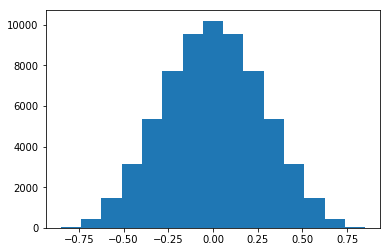

In [26]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins = 15)
pylab.show()

In [29]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [30]:
print("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5))

p-value: 0.157776


In [47]:
np.random.seed(1)
print("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000))

p-value: 0.156905
